## Imports

In [1]:
import torch, torchvision
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from matplotlib import pyplot as plt 

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## Load the CIFAR-10 dataset

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

batch_size = 64
# You should use as many cores you have on your laptop
num_workers = 8

# Fill in the options for both data loaders. Warning: the training dataloader should shuffle the data
trainloader = torch.utils.data.DataLoader(trainset, num_workers=num_workers, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, num_workers=num_workers, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualize the Images of CIFAR-10

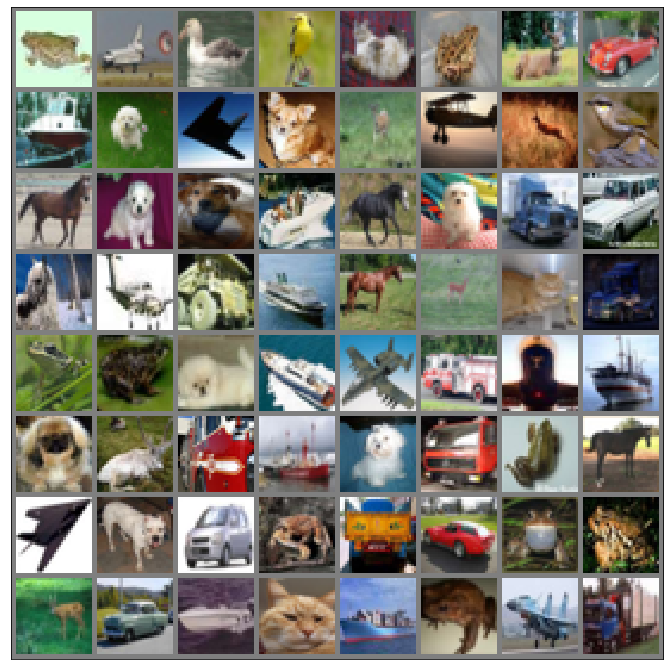

 frog plane  bird  bird   cat  frog  deer   car  ship   dog plane   dog  deer plane  deer  bird horse   dog   dog  ship horse   dog truck   car horse plane truck  ship horse  deer   cat truck  frog  frog   dog  ship plane truck plane  ship   dog  deer truck  ship   dog truck  frog horse plane   dog   car  frog truck   car  frog  frog  deer   car  ship   cat  ship  frog plane truck


In [4]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Creating a MLP model and train it

### Hyperparameters

In [5]:
input_dim = 32 * 32 * 3
hidden_dim = 1024*16
output_dim = len(classes)
learning_rate = 0.001
num_epochs = 128

### Network Architecture

- You need to implement multi-layer perceptron for the problem of classifying CIFAR-10 images
- You will also have to define the forward pass yourself.

In [6]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Softmax(-1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

### Create the Network

- You are now ready to create your neural network object
- You will also have to define an appropriate loss function to minimize and an optimization algorithm
- By default, you can use the cross-entropy loss and the adam optimizer

In [7]:
model = Net(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.89)

### Train the Network

- Once you have your neural network you just need to train it. 
- You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. 

In [12]:
from tqdm import tqdm

def train(num_epochs):
    vram_cache = [] # storing the dataset on the gpu since i can afford it :D
    for inputs, targets in trainloader:
        vram_cache.append((inputs.to(device), targets.to(device)))
    
    for i in tqdm(range(num_epochs)):
        for inputs, targets in vram_cache:
            model.train(True)
            optimizer.zero_grad()

            outputs = model(inputs)

            loss = F.cross_entropy(outputs, targets)

            print(f"Epoch {i + 1}, Loss: {loss.item():.4f}", end="\r")

            loss.backward()
            optimizer.step()


In [13]:
train(num_epochs)

  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:18<38:22, 18.13s/it]

  2%|▏         | 2/128 [00:36<38:06, 18.15s/it]

  2%|▏         | 3/128 [00:54<37:49, 18.16s/it]

  3%|▎         | 4/128 [01:12<37:31, 18.16s/it]

  4%|▍         | 5/128 [01:30<37:14, 18.17s/it]

  5%|▍         | 6/128 [01:48<36:57, 18.17s/it]

  5%|▌         | 7/128 [02:07<36:40, 18.18s/it]

  6%|▋         | 8/128 [02:25<36:23, 18.19s/it]

  7%|▋         | 9/128 [02:43<36:06, 18.20s/it]

  8%|▊         | 10/128 [03:01<35:48, 18.21s/it]

  9%|▊         | 11/128 [03:20<35:30, 18.21s/it]

  9%|▉         | 12/128 [03:38<35:11, 18.20s/it]

 10%|█         | 13/128 [03:56<34:52, 18.20s/it]

 11%|█         | 14/128 [04:14<34:35, 18.21s/it]

 12%|█▏        | 15/128 [04:32<34:20, 18.24s/it]

 12%|█▎        | 16/128 [04:51<34:02, 18.24s/it]

 13%|█▎        | 17/128 [05:09<33:42, 18.22s/it]

 14%|█▍        | 18/128 [05:27<33:23, 18.22s/it]

 15%|█▍        | 19/128 [05:45<33:05, 18.21s/it]

 16%|█▌        | 20/128 [06:04<32:47, 18.22s/it]

 16%|█▋        | 21/128 [06:22<32:30, 18.23s/it]

 17%|█▋        | 22/128 [06:40<32:15, 18.26s/it]

 18%|█▊        | 23/128 [06:58<31:57, 18.27s/it]

 19%|█▉        | 24/128 [07:17<31:39, 18.27s/it]

 20%|█▉        | 25/128 [07:35<31:20, 18.26s/it]

 20%|██        | 26/128 [07:53<31:01, 18.25s/it]

 21%|██        | 27/128 [08:11<30:42, 18.24s/it]

 22%|██▏       | 28/128 [08:30<30:23, 18.23s/it]

 23%|██▎       | 29/128 [08:48<30:04, 18.22s/it]

 23%|██▎       | 30/128 [09:06<29:45, 18.22s/it]

 24%|██▍       | 31/128 [09:24<29:27, 18.22s/it]

 25%|██▌       | 32/128 [09:42<29:09, 18.22s/it]

 26%|██▌       | 33/128 [10:01<28:50, 18.22s/it]

 27%|██▋       | 34/128 [10:19<28:32, 18.22s/it]

 27%|██▋       | 35/128 [10:37<28:14, 18.22s/it]

 28%|██▊       | 36/128 [10:55<27:56, 18.22s/it]

 29%|██▉       | 37/128 [11:14<27:37, 18.22s/it]

 30%|██▉       | 38/128 [11:32<27:19, 18.22s/it]

 30%|███       | 39/128 [11:50<27:01, 18.22s/it]

 31%|███▏      | 40/128 [12:08<26:43, 18.22s/it]

 32%|███▏      | 41/128 [12:26<26:25, 18.22s/it]

 33%|███▎      | 42/128 [12:45<26:06, 18.22s/it]

 34%|███▎      | 43/128 [13:03<25:48, 18.22s/it]

 34%|███▍      | 44/128 [13:21<25:30, 18.22s/it]

 35%|███▌      | 45/128 [13:39<25:12, 18.22s/it]

 36%|███▌      | 46/128 [13:57<24:54, 18.22s/it]

 37%|███▋      | 47/128 [14:16<24:35, 18.22s/it]

 38%|███▊      | 48/128 [14:34<24:17, 18.22s/it]

 38%|███▊      | 49/128 [14:52<24:00, 18.23s/it]

 39%|███▉      | 50/128 [15:10<23:42, 18.24s/it]

 40%|███▉      | 51/128 [15:29<23:24, 18.23s/it]

 41%|████      | 52/128 [15:47<23:06, 18.24s/it]

 41%|████▏     | 53/128 [16:05<22:47, 18.24s/it]

 42%|████▏     | 54/128 [16:23<22:29, 18.23s/it]

 43%|████▎     | 55/128 [16:42<22:10, 18.23s/it]

 44%|████▍     | 56/128 [17:00<21:52, 18.23s/it]

 45%|████▍     | 57/128 [17:18<21:34, 18.23s/it]

 45%|████▌     | 58/128 [17:36<21:15, 18.23s/it]

 46%|████▌     | 59/128 [17:54<20:57, 18.23s/it]

 47%|████▋     | 60/128 [18:13<20:38, 18.22s/it]

 48%|████▊     | 61/128 [18:31<20:20, 18.21s/it]

 48%|████▊     | 62/128 [18:49<20:01, 18.21s/it]

 49%|████▉     | 63/128 [19:07<19:44, 18.22s/it]

 50%|█████     | 64/128 [19:26<19:26, 18.22s/it]

 51%|█████     | 65/128 [19:44<19:07, 18.22s/it]

 52%|█████▏    | 66/128 [20:02<18:49, 18.22s/it]

 52%|█████▏    | 67/128 [20:20<18:32, 18.24s/it]

 53%|█████▎    | 68/128 [20:39<18:14, 18.24s/it]

 54%|█████▍    | 69/128 [20:57<17:55, 18.23s/it]

 55%|█████▍    | 70/128 [21:15<17:37, 18.24s/it]

 55%|█████▌    | 71/128 [21:33<17:19, 18.23s/it]

 56%|█████▋    | 72/128 [21:51<17:01, 18.24s/it]

 57%|█████▋    | 73/128 [22:10<16:42, 18.23s/it]

 58%|█████▊    | 74/128 [22:28<16:24, 18.23s/it]

 59%|█████▊    | 75/128 [22:46<16:05, 18.23s/it]

 59%|█████▉    | 76/128 [23:04<15:47, 18.22s/it]

 60%|██████    | 77/128 [23:23<15:29, 18.23s/it]

 61%|██████    | 78/128 [23:41<15:13, 18.26s/it]

 62%|██████▏   | 79/128 [23:59<14:54, 18.26s/it]

 62%|██████▎   | 80/128 [24:17<14:35, 18.24s/it]

 63%|██████▎   | 81/128 [24:36<14:16, 18.23s/it]

 64%|██████▍   | 82/128 [24:54<13:58, 18.23s/it]

 65%|██████▍   | 83/128 [25:12<13:40, 18.22s/it]

 66%|██████▌   | 84/128 [25:30<13:21, 18.21s/it]

 66%|██████▋   | 85/128 [25:48<13:03, 18.21s/it]

 67%|██████▋   | 86/128 [26:07<12:45, 18.21s/it]

 68%|██████▊   | 87/128 [26:25<12:27, 18.22s/it]

 69%|██████▉   | 88/128 [26:43<12:09, 18.23s/it]

 70%|██████▉   | 89/128 [27:01<11:50, 18.23s/it]

 70%|███████   | 90/128 [27:20<11:32, 18.23s/it]

 71%|███████   | 91/128 [27:38<11:14, 18.22s/it]

 72%|███████▏  | 92/128 [27:56<10:55, 18.22s/it]

 73%|███████▎  | 93/128 [28:14<10:37, 18.22s/it]

 73%|███████▎  | 94/128 [28:32<10:19, 18.22s/it]

 74%|███████▍  | 95/128 [28:51<10:01, 18.22s/it]

 75%|███████▌  | 96/128 [29:09<09:43, 18.22s/it]

 76%|███████▌  | 97/128 [29:27<09:24, 18.22s/it]

 77%|███████▋  | 98/128 [29:45<09:06, 18.22s/it]

 77%|███████▋  | 99/128 [30:04<08:48, 18.22s/it]

 78%|███████▊  | 100/128 [30:22<08:30, 18.22s/it]

 79%|███████▉  | 101/128 [30:40<08:11, 18.22s/it]

 80%|███████▉  | 102/128 [30:58<07:53, 18.21s/it]

 80%|████████  | 103/128 [31:16<07:35, 18.21s/it]

 81%|████████▏ | 104/128 [31:35<07:17, 18.21s/it]

 82%|████████▏ | 105/128 [31:53<06:59, 18.22s/it]

 83%|████████▎ | 106/128 [32:11<06:40, 18.22s/it]

 84%|████████▎ | 107/128 [32:29<06:22, 18.22s/it]

 84%|████████▍ | 108/128 [32:48<06:04, 18.22s/it]

 85%|████████▌ | 109/128 [33:06<05:46, 18.22s/it]

 86%|████████▌ | 110/128 [33:24<05:27, 18.21s/it]

 87%|████████▋ | 111/128 [33:42<05:09, 18.22s/it]

 88%|████████▊ | 112/128 [34:00<04:51, 18.22s/it]

 88%|████████▊ | 113/128 [34:19<04:33, 18.22s/it]

 89%|████████▉ | 114/128 [34:37<04:15, 18.24s/it]

 90%|████████▉ | 115/128 [34:55<03:57, 18.26s/it]

 91%|█████████ | 116/128 [35:13<03:38, 18.25s/it]

 91%|█████████▏| 117/128 [35:32<03:20, 18.24s/it]

 92%|█████████▏| 118/128 [35:50<03:02, 18.23s/it]

 93%|█████████▎| 119/128 [36:08<02:44, 18.23s/it]

 94%|█████████▍| 120/128 [36:26<02:25, 18.22s/it]

 95%|█████████▍| 121/128 [36:44<02:07, 18.22s/it]

 95%|█████████▌| 122/128 [37:03<01:49, 18.22s/it]

 96%|█████████▌| 123/128 [37:21<01:31, 18.22s/it]

 97%|█████████▋| 124/128 [37:39<01:12, 18.22s/it]

 98%|█████████▊| 125/128 [37:57<00:54, 18.22s/it]

 98%|█████████▊| 126/128 [38:16<00:36, 18.22s/it]

 99%|█████████▉| 127/128 [38:34<00:18, 18.22s/it]

100%|██████████| 128/128 [38:52<00:00, 18.22s/it]

## Evaluate the final performance of the Network

- Once you think your network is properly trained, you will test its performance on the testing-set of the CIFAR-10 dataset
- Compute the final accuracy of your model
- You should be able to reach a 50% accuracy with a simple multi-layer perceptron

In [16]:
def test(model, testloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation during testing
        for inputs, targets in testloader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets.to(device)).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")

In [17]:
test(model, testloader)

Accuracy on the test set: 54.03%
